In [1]:
#Logistic Regression on Crypto
#sorce code by LeSniper
#home by ryoung
#Will it go up or down? (Created Live on Video)
from os import system
system("clear")


0

In [2]:
#Load CSV into a Dataframe
import pandas as pd
btcdf=pd.read_csv('data/Bitcoin.csv', sep=',', header='infer')
#print(btcdf.values)

ethdf=pd.read_csv('data/Ethereum.csv', sep=',', header='infer')
#print(ethdf.values)

In [3]:

#Cleanup data by just 2017-2021 for both
#Find 2017 row number, row 2359
count = 0
for row in btcdf['Date']:
    if '2017' in row:
        print(row)
        print(count)
        break
    count +=1

cleanbtcdf = btcdf.drop(
    labels=range(0,count), #2359
    axis=0,
    inplace=False
)

2017-01-01
2359


In [4]:
#Next lets drop first row (SNo)
cleanbtcdf.drop(labels=['SNo'], axis=1, inplace=True)
#Reset index since the row removal doesn't do that
cleanbtcdf = cleanbtcdf.reset_index(drop=True)
#print(cleanbtcdf)


In [5]:
#Do the same thng for ethereum
count = 0
for row in ethdf['Date']:
    if '2017' in row:
        print(row)
        print(count)
        break
    count +=1

cleanethdf = ethdf.drop(
    labels=range(0,count), #297
    axis=0,
    inplace=False
)

2017-01-01
297


We want as input, BTC open/close and ETH open. Then as output
we want ETH closing price. The idea is to see if we can predict
the closing ETH price for the day based on how Bitcoin performed
the same day and what the starting price of ETH was that day.
This is to see if there is a correlation between both cryptos.

In [6]:
#Next lets drop first row (SNo)
cleanethdf.drop(labels=['SNo'], axis=1, inplace=True)
#Reset index since the row removal doesn't do that
cleanethdf = cleanethdf.reset_index(drop=True)
#print(cleanethdf)
print(len(cleanbtcdf),'==',len(cleanethdf))

#We want as input, BTC open/close and ETH open. Then as output
#we want ETH closing price. The idea is to see if we can predict
#the closing ETH price for the day based on how Bitcoin performed
#the same day and what the starting price of ETH was that day.
#This is to see if there is a correlation between both cryptos.

#First let's lego both dataframe together
btcethdf = pd.concat([cleanbtcdf, cleanethdf], axis=1, join='outer')
#print(btcethdf)

#Let's rename columns and remove the duplicate Date column
#print(btcethdf.columns)
btcethdf.columns = ['Date', 'BTCPrice', 'BTCOpen', 'BTCHigh', 
'BTCLow', 'BTCVol.', 'BTCChange %', 'ETHDate', 'ETHPrice', 
'ETHOpen', 'ETHHigh', 'ETHLow', 'ETHVol.', 'ETHChange %']
btcethdf.drop(labels=['ETHDate'], axis=1,inplace=True)
print(btcethdf)
#print(btcethdf.columns)

1697 == 1697
            Date  BTCPrice  BTCOpen  BTCHigh   BTCLow   BTCVol.  BTCChange %  \
0     2017-01-01     995.4    963.4   1001.6    956.1   41150.0         3.33   
1     2017-01-02    1017.0    995.4   1031.7    990.2   64950.0         2.17   
2     2017-01-03    1033.3   1017.0   1035.5   1006.5   54790.0         1.60   
3     2017-01-04    1135.4   1033.3   1148.5   1022.3  156270.0         9.88   
4     2017-01-05     989.3   1135.4   1150.6    874.5  240010.0       -12.86   
...          ...       ...      ...      ...      ...       ...          ...   
1692  2021-08-20   49324.0  46756.7  49343.3  46646.8   83190.0         5.49   
1693  2021-08-21   48875.8  49330.0  49719.1  48293.5   18200.0        -0.91   
1694  2021-08-22   49254.5  48870.4  49480.3  48151.0   49320.0         0.77   
1695  2021-08-23   49539.7  49255.4  50498.8  49038.6   75370.0         0.58   
1696  2021-08-24   49768.2  49532.5  49847.4  48812.4   61160.0         0.46   

      ETHPrice  ETHOpen  E

In [7]:

#Let's make our X Features (Closing Price is called 'Price')
crypto_X = btcethdf[['BTCOpen', 'BTCPrice', 'ETHOpen']].copy()
#Our output Y:
crypto_Y = btcethdf['ETHPrice'].copy()

#change code to logistic regression
#1 is price goes up and 0 is price goes down
tmp_price = []

#should be 1697

for i in range(len(btcethdf)):
    if btcethdf['ETHPrice'][i] > btcethdf['ETHOpen'][i]:
        tmp_price.append(1)
    else:
        tmp_price.append(0)

crypto_Y2 = pd.Series(tmp_price, copy=False)
print(crypto_Y2)
exit()




0       1
1       1
2       1
3       1
4       0
       ..
1692    1
1693    0
1694    1
1695    1
1696    1
Length: 1697, dtype: int64


In [8]:

#New Code for Logistic Regression
tmp_price = [] #List stores a 1 for price go up and 0 for price go down

for i in range(len(btcethdf)):
    if btcethdf['ETHPrice'][i] > btcethdf['ETHOpen'][i]:
        tmp_price.append(1) #Higher close price (went up)
    else:
        tmp_price.append(0) #Lower/equal close than open (went down)
crypto_Y2 = pd.Series(tmp_price, copy=False)
print(crypto_Y2)

0       1
1       1
2       1
3       1
4       0
       ..
1692    1
1693    0
1694    1
1695    1
1696    1
Length: 1697, dtype: int64


In [9]:

#NEW: Modified Y to Y2 for log regr
#Split the data into training/testing sets randomly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    crypto_X, crypto_Y2, test_size=0.20, random_state=103)

#Create linear regression object
from sklearn import linear_model
logregr = linear_model.LogisticRegression(random_state=103, solver="lbfgs", max_iter=50)

In [ ]:
#Train the model using the trianing set
logregr.fit(X_train.values, y_train.values) #.values to remove warning




In [ ]:
#Make predictions with the model we just training and comparing
#them with the expected results in the test data set
y_pred = logregr.predict(X_test)

In [ ]:
print(y_pred)
print(y_test)


In [ ]:
#Metrics
from sklearn import metrics
trainscore = logregr.score(X_train, y_train)
testscore = logregr.score(X_test, y_test)
overallscore = logregr.score(crypto_X, crypto_Y2)

print("Accuracy Train:", trainscore)
print("Accuracy Test:",  testscore)
print("Accuracy Overall:", overallscore)
print("Count:", len(y_pred))
print(metrics.precision_recall_fscore_support(y_test, y_pred,
 labels=[0,1]))
print(metrics.confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print("Precision:", tp/(tp+fp)) #the less fp the better precision
print("Recall:", tp/(tp+fn)) #the less fn the better recall.
print("Harmonic:", 2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn)))


Accuracy Train: 0.7708179808400885
Accuracy Test: 0.7705882352941177
Accuracy Overall: 0.7707719505008839
Count: 340
(array([0.81456954, 0.73544974]), array([0.71098266, 0.83233533]), array([0.75925926, 0.78089888]), array([173, 167]))
[[123  50]
 [ 28 139]]
123 50 28 139
Precision: 0.7354497354497355
Recall: 0.8323353293413174
Harmonic: 0.7808988764044945


In [ ]:
#Sample Test
#Correct: 3329.47 ETH Closing price on 8/24
#Opening ETH price was 3322.6
#Bitcoin Open 49532.5 
#Bitcoin Close 49768.2
from numpy import FPE_DIVIDEBYZERO, array as nparray
answer = logregr.predict(nparray([[49532.5, 49768.2, 3322.6]]))
print("Expected: 1, Predicted:", answer[0])

Expected: 1, Predicted: 1


In [ ]:
#2/20/2022 5:25AM PST
#ETH OPEN  2723.79, ETH CLOSE 2630.48
#BTC OPEN 39891.25  BTC CLOSE 38240.97

answer = logregr.predict(nparray([[39891.25, 38240.97, 2723.79]]))
print("Expected: 0, Predicted:", answer[0])


Expected: 0, Predicted: 0


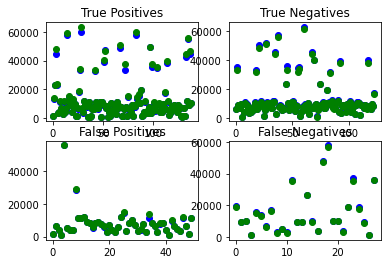

In [ ]:
# Plot outputs
import matplotlib.pyplot as plt
TN = [[],[]]
FP = [[],[]]
FN = [[],[]]
TP = [[],[]]
for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test.values[i] == 1:   #TP
        TP[0].append(X_test['BTCOpen'].values[i])
        TP[1].append(X_test['BTCPrice'].values[i])
    elif y_pred[i] == 0 and y_test.values[i] == 0: #TN
        TN[0].append(X_test['BTCOpen'].values[i])
        TN[1].append(X_test['BTCPrice'].values[i])       
    elif y_pred[i] == 1 and y_test.values[i] == 0: #FP
        FP[0].append(X_test['BTCOpen'].values[i])
        FP[1].append(X_test['BTCPrice'].values[i])
    else: #y_pred[i] == 0 and y_test.values[i] == 1: #FN
        FN[0].append(X_test['BTCOpen'].values[i])
        FN[1].append(X_test['BTCPrice'].values[i])

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title('True Positives')
ax2.set_title('True Negatives')
ax3.set_title('False Positives')
ax4.set_title('False Negatives')

ax1.scatter(range(len(TP[0])), TP[0], color="blue")
ax1.scatter(range(len(TP[1])), TP[1], color="green")
ax2.scatter(range(len(TN[0])), TN[0], color="blue")
ax2.scatter(range(len(TN[1])), TN[1], color="green")
ax3.scatter(range(len(FP[0])), FP[0], color="blue")
ax3.scatter(range(len(FP[1])), FP[1], color="green")
ax4.scatter(range(len(FN[0])), FN[0], color="blue")
ax4.scatter(range(len(FN[1])), FN[1], color="green")

#ax1.scatter(range(28), TP[0][0:28], color="blue")
#ax1.scatter(range(28), TP[1][0:28], color="green")
#ax2.scatter(range(28), TN[0][0:28], color="blue")
#ax2.scatter(range(28), TN[1][0:28], color="green")
#ax3.scatter(range(28), FP[0][0:28], color="blue")
#ax3.scatter(range(28), FP[1][0:28], color="green")
#ax4.scatter(range(len(FN[0])), FN[0], color="blue")
#ax4.scatter(range(len(FN[1])), FN[1], color="green")

plt.show()
